# COMP 3122 – Assignment 01 (Individual Assignment)

###     Video
Create a video between 3-5 minutes long explaining the function calls you have used, the parameters passed and most importantly, the reason for performing each step as related to Machine learning.
*    You must upload this YouTube or any video streaming platform.
*    The video cannot be private, it must be **unlisted** or **public**

Please write your name and relevant info in the first cell(s) as follow:
**Arash Shalchian**

#### **Student ID**: 101414035

In [1]:
import numpy as np
import pandas as pd #optional - you may use it to read the csv file instead of numpy
import matplotlib.pyplot as plt

### Question 1:	(1 point)

1. Import the `biostats.csv` file and store it in an appropriate dataset with the variable name `biostats_array`.

2. Fetch the Age column of the dataset as an array, and use a variable `ages` to hold it.

In [19]:
#Your code here

# pandas version
biostats_df = pd.read_csv('biostats1.csv')
biostats_array = biostats_df  # Create biostats_array for consistency with later questions
ages = biostats_df['Age'].values
print(f"Ages: {ages}")

Ages: [41 42 32 39 30 33 26 30 53 32 47 34 23 36 38 31 29 28]


### Question 2:	 (1 point)

Write `Python` code to calculate the average (mean), median, standard deviation, minimum and maximum of the array.

**Important Note: Do not use `python` or `numpy` bult-in functions.**


**Hints:**
#### Formula for Median

The `median` is the middle value in a dataset when the values are sorted in ascending order.

- If the dataset has odd number of elements → median = middle element.

- If the dataset has even number of elements → median = average of the two middle elements.


#### Formula for Standard Deviation

The **population standard deviation** is:

$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
$

Where:  
- $x_i$ = each data point  
- $\mu$ = mean of the dataset  
- $N$ = total number of data points  





In [7]:
#your code here
# calculation of mean
total = 0
count = 0
for age in ages:
    total += age
    count += 1
my_average = total / count

# calculation of minimum and maximum
my_minimum = ages[0]
my_maximum = ages[0]
for age in ages:
    if age < my_minimum:
        my_minimum = age
    if age > my_maximum:
        my_maximum = age

# calculation of median
sorted_ages = sorted(ages)
n = len(sorted_ages)
if n % 2 == 1:  # odd number of elements
    my_median = sorted_ages[n // 2]
else:  # even number of elements
    my_median = (sorted_ages[n // 2 - 1] + sorted_ages[n // 2]) / 2

# calculation of standard deviation
sum_squared_diff = 0
for age in ages:
    sum_squared_diff += (age - my_average) ** 2

variance = sum_squared_diff / count
my_std = variance ** 0.5

print(f"Mean: {my_average}")
print(f"Median: {my_median}")
print(f"Standard Deviation: {my_std}")
print(f"Minimum: {my_minimum}")
print(f"Maximum: {my_maximum}")

Mean: 34.666666666666664
Median: 32.5
Standard Deviation: 7.363574011458175
Minimum: 23
Maximum: 53


### Question 3:	 (1 point)

Use methods of `numpy` package to calculate the follwoing statistics of the array;
- average,
- standard deviation,
- minimum and maximum,
- 30th and 70th percentile

In [8]:
#your code here
# Using NumPy built-in functions
average_numpy = np.mean(ages)
median_numpy = np.median(ages)
std_numpy = np.std(ages)
min_numpy = np.min(ages)
max_numpy = np.max(ages)
p30 = np.percentile(ages, 30)
p70 = np.percentile(ages, 70)

print(f"Average (NumPy): {average_numpy}")
print(f"Median (NumPy): {median_numpy}")
print(f"Std Dev (NumPy): {std_numpy}")
print(f"Min (NumPy): {min_numpy}")
print(f"Max (NumPy): {max_numpy}")
print(f"30th Percentile: {p30}")
print(f"70th Percentile: {p70}")

Average (NumPy): 34.666666666666664
Median (NumPy): 32.5
Std Dev (NumPy): 7.363574011458175
Min (NumPy): 23
Max (NumPy): 53
30th Percentile: 30.1
70th Percentile: 37.8


### Question 4:	(1 point)

Using the Matplotlib library,

1. draw a histogram chart for the Age column. Use an appropriate title, X-label, and Y-label. Moreover, include your first name in the title, e.g. Age Distribution – By Reza.

2. draw vertical lines in mean, median and 30th and 70th percentiles in the histogram. (hint: use `plt.axvline()` method to draw vertical line)

3. Calculate how many data points fall below the 30th percentile and verify that this number is approximately **30% of all data**. Repeat the calculation for the 70th percentile.

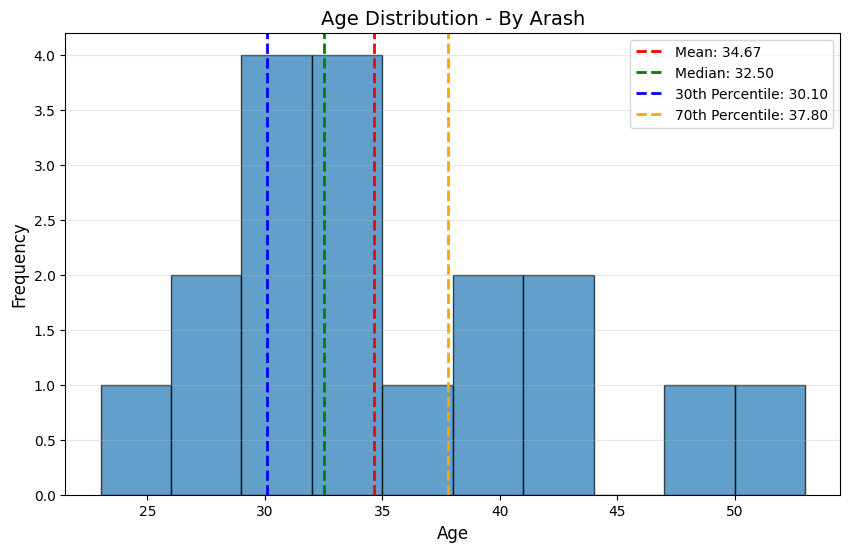


Verification:
Data points below 30th percentile: 6 (33.33%)
Data points below 70th percentile: 12 (66.67%)
Expected: ~30% and ~70% respectively


In [ ]:
#your code here
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=10, edgecolor='black', alpha=0.7)

# add vertical lines
plt.axvline(average_numpy, color='red', linestyle='--', linewidth=2, label=f'Mean: {average_numpy:.2f}')
plt.axvline(median_numpy, color='green', linestyle='--', linewidth=2, label=f'Median: {median_numpy:.2f}')
plt.axvline(p30, color='blue', linestyle='--', linewidth=2, label=f'30th Percentile: {p30:.2f}')
plt.axvline(p70, color='orange', linestyle='--', linewidth=2, label=f'70th Percentile: {p70:.2f}')

# add labels and title
plt.title('Age Distribution - By Arash', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# verify percentiles
count_below_p30 = np.sum(ages < p30)
count_below_p70 = np.sum(ages < p70)
total_count = len(ages)

percent_below_p30 = (count_below_p30 / total_count) * 100
percent_below_p70 = (count_below_p70 / total_count) * 100

print(f"\nVerification:")
print(f"Data points below 30th percentile: {count_below_p30} ({percent_below_p30:.2f}%)")
print(f"Data points below 70th percentile: {count_below_p70} ({percent_below_p70:.2f}%)")
print(f"Expected: ~30% and ~70% respectively")

### Question 5: Broadcasting (2 points)

Using the biostats dataset you loaded earlier:

1.   Use broadcasting to convert:
*   `Height(Inches)` → meters (1 inch = 0.0254 m)

*   `Weight(Pounds)` → kilograms (1 lb = 0.453592 kg)

2.   Compute a BMI array using broadcasting:
BMI = weight_kg / (height_m)^2

3.   Create a z-score normalized age array (no loops):

z = (ages - mean(ages))/std(ages)

Rules: Use vectorized NumPy operations only (no Python loops)








In [ ]:
# Assume biostats_array columns include: Name, Sex, Age, Height(Inches), Weight(Pounds)
# If you used pandas earlier, you may extract the columns as NumPy arrays with .to_numpy()

heights_in = biostats_array['Height']  # in inches
weights_lb = biostats_array['Weight']  # in pounds

# convert using broadcasting (vectorized operations)
heights_m = heights_in * 0.0254
weights_kg = weights_lb * 0.453592

bmi = weights_kg / (heights_m ** 2)  # weight_kg / (height_m ** 2)

# Z-score
ages_z = (ages - np.mean(ages)) / np.std(ages)  # z-scored ages using broadcasted mean

print(f"Heights in meters (first 5): {heights_m[:5]}")
print(f"Weights in kg (first 5): {weights_kg[:5]}")
print(f"BMI values (first 5): {bmi[:5]}")
print(f"Z-scored ages (first 5): {ages_z[:5]}")
print(f"\nMean of z-scored ages (should be ~0): {np.mean(ages_z):.10f}")
print(f"Std of z-scored ages (should be ~1): {np.std(ages_z):.10f}")

Heights in meters (first 5): [1.8796 1.7272 1.778  1.8288 1.6764]
Weights in kg (first 5): [77.11064  75.296272 70.30676  75.749864 56.245408]
BMI values (first 5): [21.82646659 25.23993404 22.23993795 22.64902084 20.01390192]
Z-scored ages (first 5): [ 0.86008959  0.99589321 -0.36214298  0.58848235 -0.63375022]

Mean of z-scored ages (should be ~0): 0.0000000000
Std of z-scored ages (should be ~1): 1.0000000000


###     Question 6: Indexing with Booleans & Bit Masks (2 points)
Using boolean masks (and bitwise operators &, |, ~):


1.   Create a mask for adults (Age >= 18) and compute:
*   Count of adults
*   Average BMI among adults


2.   Create a mask for females under 30 and compute:
*   Count
*   Median BMI

3. Create a mask for overweight (use BMI ≥ 25) and compute:
*   Percentage of dataset that is overweight
*   Average age of overweight group

Rules: Use boolean arrays and bitwise ops. Don't use loops.

In [ ]:
# You may have 'sex' as an array of strings like 'M'/'F' depending on your CSV
# Extract Sex column from the dataset
sex = biostats_array['Sex']

sex_clean = np.char.strip(np.char.replace(np.char.replace(sex.astype(str), '"', ''), ' ', ''))

# boolean masks using bitwise operators
adults_mask = ages >= 18                # Age >= 18
females_under30_mask = (sex_clean == 'F') & (ages < 30)  # (Sex == 'F') & (Age < 30)
overweight_mask = bmi >= 25            # BMI >= 25

# statistics for adults
num_adults = np.sum(adults_mask)
avg_bmi_adults = np.mean(bmi[adults_mask])

# statistics for females under 30
num_f_under30 = np.sum(females_under30_mask)
median_bmi_f_under30 = np.median(bmi[females_under30_mask]) if num_f_under30 > 0 else 0

# statistics for overweight individuals
pct_overweight = (np.sum(overweight_mask) / len(bmi)) * 100  # 0..100
avg_age_overweight = np.mean(ages[overweight_mask]) if np.sum(overweight_mask) > 0 else 0

print(f"Sex values after cleaning: {np.unique(sex_clean)}")
print(f"\nAdults (Age >= 18):")
print(f"  Count: {num_adults}")
print(f"  Average BMI: {avg_bmi_adults:.2f}")

print(f"\nFemales under 30:")
print(f"  Count: {num_f_under30}")
print(f"  Median BMI: {median_bmi_f_under30:.2f}")

print(f"\nOverweight individuals (BMI >= 25):")
print(f"  Percentage of dataset: {pct_overweight:.2f}%")
print(f"  Average age: {avg_age_overweight:.2f}")

Sex values after cleaning: ['F' 'M']

Adults (Age >= 18):
  Count: 18
  Average BMI: 21.50

Females under 30:
  Count: 3
  Median BMI: 20.77

Overweight individuals (BMI >= 25):
  Percentage of dataset: 5.56%
  Average age: 42.00


###    Question 7: Simple Linear Regression on Biostats (4 point)

Use Age (feature) to predict Weight(kg) in the biostats data:

1.   Split 80/20 with random_state=0.
2.   Fit LinearRegression() (no scaling needed for a single feature).
3.   Report test R² and RMSE.
4.   Plot Age vs Weight with the fitted regression line.


Linear Regression Results:
Test R² Score: -0.7564
Test RMSE: 12.9026
Model Coefficient (slope): 1.2982
Model Intercept: 23.8090


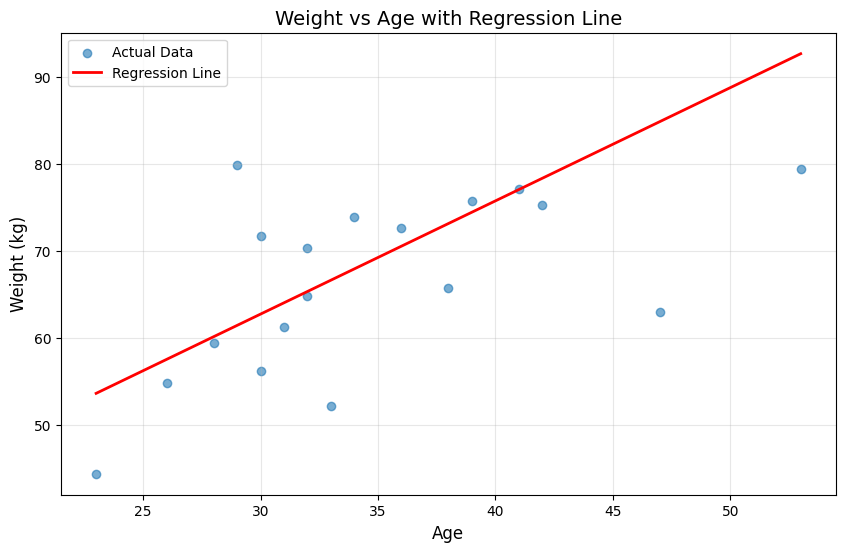

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
X_age = ages.reshape(-1, 1)         # ages.reshape(-1, 1)
y_wkg = weights_kg         # weights_kg

# Split 80/20 with random_state=0
X_tr, X_te, y_tr, y_te = train_test_split(X_age, y_wkg, test_size=0.2, random_state=0)

# Fit the linear regression model
linreg = LinearRegression()
linreg.fit(X_tr, y_tr)

# Make predictions on test set
y_pred_te = linreg.predict(X_te)

# Calculate metrics
r2_bio = r2_score(y_te, y_pred_te)
rmse_bio = np.sqrt(mean_squared_error(y_te, y_pred_te))

print(f"Linear Regression Results:")
print(f"Test R² Score: {r2_bio:.4f}")
print(f"Test RMSE: {rmse_bio:.4f}")
print(f"Model Coefficient (slope): {linreg.coef_[0]:.4f}")
print(f"Model Intercept: {linreg.intercept_:.4f}")

# Plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(ages, weights_kg, alpha=0.6, label='Actual Data')

# Generate line for plotting
line_x = np.linspace(ages.min(), ages.max(), 100).reshape(-1, 1)
line_y = linreg.predict(line_x)
plt.plot(line_x, line_y, color='red', linewidth=2, label='Regression Line')

plt.title("Weight vs Age with Regression Line", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Weight (kg)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()